In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn import *

In [39]:
features, target = datasets.load_boston(return_X_y = True)

In [40]:
features.shape

(506, 13)

In [41]:
features_scaled = preprocessing.scale(features)

In [42]:
model = neighbors.KNeighborsRegressor(metric = 'minkowski', n_neighbors = 5, weights = 'distance')

In [43]:
power = np.linspace(1, 10, 200)

In [44]:
cv = model_selection.KFold(n_splits = 5, random_state = 42, shuffle = True)
calc = model_selection.cross_validate(model, features, target, scoring = 'neg_mean_squared_error', cv = cv)

In [45]:
score = []

for i in range(0, len(power)):
    
    model = neighbors.KNeighborsRegressor(metric = 'minkowski', n_neighbors = 5, weights = 'distance', p = power[i])
    calc = model_selection.cross_validate(model, features, target, scoring = 'neg_mean_squared_error', cv = cv)
    
    score.append(abs(np.mean(calc['test_score'])))

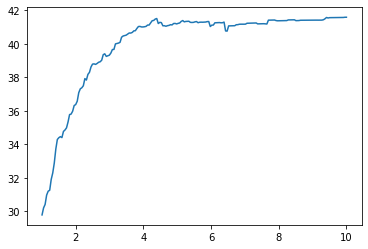

In [46]:
plt.plot(power, score)

In [47]:
file = open('answer_2_1.txt', 'w')
file.write('{}'.format(power[np.argmin(score)]))
file.close()